#Amazon product Review Sentiment

In [ ]:
#Importing pandas and numpy libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
#Loading the csv files using pandas library
data = pd.read_csv('amazon.csv')
print(data.head())

                     id  ... reviews.username
0  AVqkIhwDv8e3D1O-lebb  ...          Adapter
1  AVqkIhwDv8e3D1O-lebb  ...           truman
2  AVqkIhwDv8e3D1O-lebb  ...            DaveZ
3  AVqkIhwDv8e3D1O-lebb  ...           Shacks
4  AVqkIhwDv8e3D1O-lebb  ...        explore42

[5 rows x 21 columns]


In [ ]:
#Whole information summary on data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [ ]:
#Checking for the unique items in asins column
data["asins"].unique()

array(['B01AHB9CN2', 'B00VINDBJK', 'B005PB2T0S', 'B002Y27P3M',
       'B01AHB9CYG', 'B01AHB9C1E', 'B01J2G4VBG', 'B00ZV9PXP2',
       'B0083Q04TA', 'B018Y229OU', 'B00REQKWGA', 'B00IOYAM4I',
       'B018T075DC', nan, 'B00DU15MU4', 'B018Y225IA', 'B005PB2T2Q',
       'B018Y23MNM', 'B00OQVZDJM', 'B00IOY8XWQ', 'B00LO29KXQ',
       'B00QJDU3KY', 'B018Y22C2Y', 'B01BFIBRIE', 'B01J4ORNHU',
       'B018SZT3BK', 'B00UH4D8G2', 'B018Y22BI4', 'B00TSUGXKE',
       'B00L9EPT8O,B01E6AO69U', 'B018Y23P7K', 'B00X4WHP5E', 'B00QFQRELG',
       'B00LW9XOJM', 'B00QL1ZN3G', 'B0189XYY0Q', 'B01BH83OOM',
       'B00BFJAHF8', 'B00U3FPN4U', 'B002Y27P6Y', 'B006GWO5NE',
       'B006GWO5WK'], dtype=object)

In [ ]:
print("Number of Unique ASINS:" , len(data["asins"].unique()))

Number of Unique ASINS: 42


In [ ]:
#Importing matplotlib library
import matplotlib.pyplot as plt
np.random.seed(7)

In [ ]:
#Using Stratified sampling technique we are splitting data
from sklearn.model_selection import StratifiedShuffleSplit
print("Before :{}".format(len(data)))
dataAfter = data.dropna(subset=["reviews.rating"])
# Removing all the Nan values
print("After  :{}".format(len(dataAfter)))
dataAfter["reviews.rating"] = dataAfter["reviews.rating"].astype(int)

Before :34660
After  :34627


In [ ]:
#Splitting data using Stratified Sampling.
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(dataAfter,dataAfter["reviews.rating"]):
    start_train = dataAfter.reindex(train_index)
    start_test = dataAfter.reindex(test_index)

In [ ]:
#Printing the values of train and test data
print(len(start_train))
print(len(start_test))

27701
6926


In [ ]:
#printing the rating of the reviews
print(start_test["reviews.rating"].value_counts()/len(start_test))

5.0    0.678458
4.0    0.254692
3.0    0.042738
1.0    0.012273
2.0    0.011262
Name: reviews.rating, dtype: float64


In [ ]:
#Copying the reviews from start_train
reviews = start_train.copy()
reviews.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
10855,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-01-29T00:00:00.000Z,2017-05-21T02:27:51Z,"2017-04-30T00:17:00.000Z,2017-06-07T08:13:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,Great price for tablet. My college son purchas...,Awesome product great stuff for kids!,NaN,NaN,EllensBiggestFan
12384,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-03-11T00:00:00.000Z,2017-05-21T03:19:03Z,"2017-04-30T00:22:00.000Z,2017-06-07T08:20:00.000Z",NaN,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,It isn't blazing fast....but fine for streamin...,For the $....not too bad,NaN,NaN,CNYRP
16505,AVqVGWLKnnc1JgDc3jF1,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",B018Y23MNM,Amazon,"Tablets,Fire Tablets,Computers & Tablets,All T...",firekidseditiontablet7displaywifi16gbgreenkidp...,Amazon,2016-12-14T00:00:00.000Z,2017-06-21T07:37:58Z,"2017-06-04T02:17:06.727Z,2017-06-03T18:41:32.958Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5026300/review...,Great to give to the little ones so they don't...,durable,NaN,NaN,debbied
14636,AVphgVaX1cnluZ0-DR74,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2017-05-03T00:00:00.000Z,2017-07-02T14:40:42Z,2017-06-07T08:14:00.000Z,NaN,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,I've bought 4 of these items on different occa...,Fire/Kindle,NaN,NaN,Maria
22309,AVpfl8cLLJeJML43AE3S,"Echo (White),,,\r\nEcho (White),,,","B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2017-06-12T00:00:00.000Z,NaN,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",NaN,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5588528/review...,we have enjoyed the unit and have used it a lo...,nice product,NaN,NaN,phil


In [ ]:
#printing the info of the dataframe info
print(reviews.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27701 entries, 10855 to 14998
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    27672 non-null  object 
 1   name                  22290 non-null  object 
 2   asins                 27671 non-null  object 
 3   brand                 27672 non-null  object 
 4   categories            27672 non-null  object 
 5   keys                  27672 non-null  object 
 6   manufacturer          27672 non-null  object 
 7   reviews.date          27652 non-null  object 
 8   reviews.dateAdded     19266 non-null  object 
 9   reviews.dateSeen      27672 non-null  object 
 10  reviews.didPurchase   0 non-null      object 
 11  reviews.doRecommend   27265 non-null  object 
 12  reviews.id            0 non-null      float64
 13  reviews.numHelpful    27310 non-null  float64
 14  reviews.rating        27672 non-null  float64
 15  reviews.sourceU

In [ ]:
#printing the review with grouping of asins and name
print(reviews.groupby("asins")["name"].unique())

asins
B005PB2T0S               [Amazon Kindle Lighted Leather Cover,,,\r\nAma...
B005PB2T2Q               [Fire Kids Edition Tablet, 7 Display, Wi-Fi, 1...
B00DU15MU4               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00IOY8XWQ               [Kindle Voyage E-reader, 6 High-Resolution Dis...
B00IOYAM4I               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00L9EPT8O,B01E6AO69U    [Echo (White),,,\r\nEcho (White),,,, Amazon Fi...
B00LO29KXQ               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00LW9XOJM                                                           [nan]
B00OQVZDJM               [Amazon Kindle Paperwhite - eBook reader - 4 G...
B00QFQRELG                                                           [nan]
B00QJDU3KY               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00QL1ZN3G                                                           [nan]
B00REQKWGA               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00TSUGXKE         

In [ ]:
#Finding the different names present in the dataset
different_names = reviews[reviews["asins"] =="B00L9EPT8O,B01E6AO69U"]["name"].unique()

In [ ]:
#Printing the unique names present in the data
for name in different_names:
    print(name)
print(reviews[reviews["asins"] == "B00L9EPT8O,B01E6AO69U"]["name"].value_counts())

Echo (White),,,
Echo (White),,,
Amazon Fire Tv,,,
Amazon Fire Tv,,,
nan
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,
Kindle Dx Leather Cover, Black (fits 9.7 Display, Latest and 2nd Generation Kindle Dxs),,
Echo (Black),,,
Echo (Black),,,
New Amazon Kindle Fire Hd 9w Powerfast Adapter Charger + Micro Usb Angle Cable,,,
New Amazon Kindle Fire Hd 9w Powerfast Adapter Charger + Micro Usb Angle Cable,,,
Amazon Kindle Fire 5ft USB to Micro-USB Cable (works with most Micro-USB Tablets),,,
Amazon Kindle Fire 5ft USB to Micro-USB Cable (works with most 

In [ ]:
#Finding the mean of the review rating
print(reviews["reviews.rating"].mean())

4.587850534836658


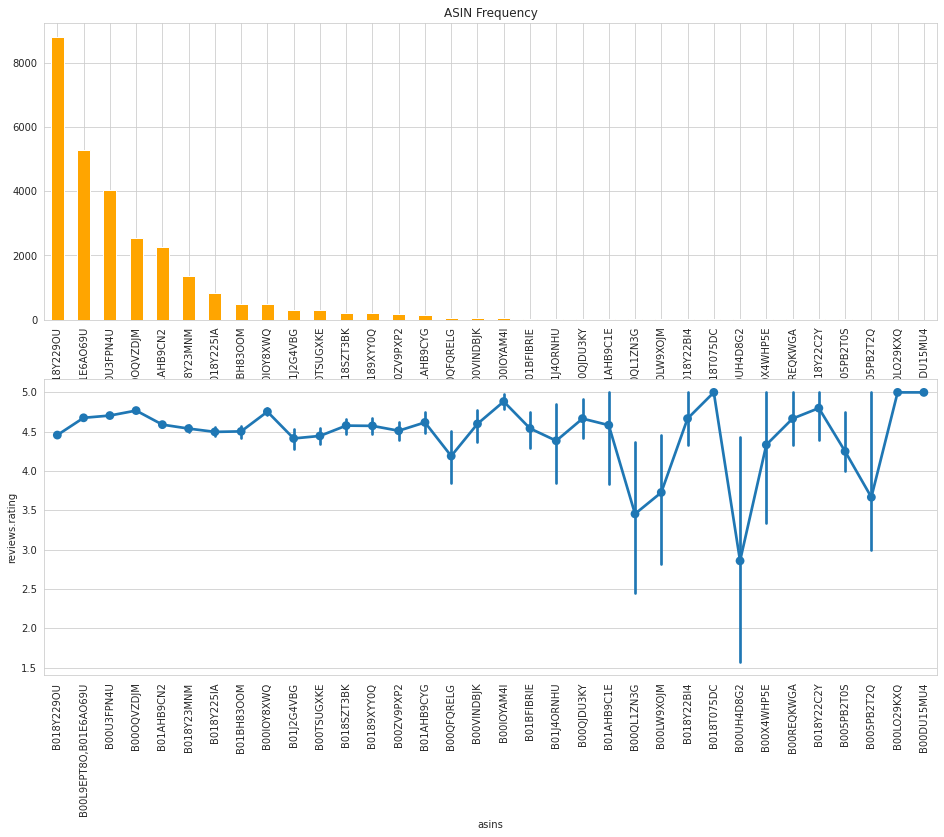

In [ ]:
#We are checking for the entire training set mean value
asins_count_ix = reviews["asins"].value_counts().index
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency",color="orange")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.rating", order=asins_count_ix, data=reviews)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Defining a function to set the positive negative and neutral
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"

In [ ]:
# Add sentiments to the data
start_train["Sentiment"] = start_train["reviews.rating"].apply(sentiments)
start_test["Sentiment"] = start_test["reviews.rating"].apply(sentiments)

In [ ]:
#Printing the outputs
print(start_train["Sentiment"][:20])

10855    Positive
12384    Positive
16505    Positive
14636    Positive
22309    Positive
1646     Positive
26052    Positive
14125    Positive
8167     Positive
18519    Positive
9823      Neutral
8971     Positive
3501     Positive
8578     Positive
4100     Positive
8423     Positive
7089     Positive
12569    Positive
12309    Positive
2225     Positive
Name: Sentiment, dtype: object
